### **1. Naive Bayes Model**





In [1]:
#Importing all the neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string
from wordcloud import WordCloud
from collections import Counter

import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import WhitespaceTokenizer as w_tokenizer
nltk.download('stopwords')

#!pip install scikit-plot
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scikitplot.metrics import plot_confusion_matrix, plot_roc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Load Data**




In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/srkcheema/GenreAnalysis/main/data.csv')
df.head()

,Unnamed: 0,title,rating,name,num_ratings,num_reviews,num_followers,synopsis,genre
0,0,Sapiens: A Brief History of Humankind,4.39,Yuval Noah Harari,"8,06,229","46,149",30.5k,"100,000 years ago, at least six human species ...",history
1,1,"Guns, Germs, and Steel: The Fates of Human Soc...",4.04,Jared Diamond,"3,67,056","12,879","6,538","""Diamond has written a book of remarkable scop...",history
2,2,A People's History of the United States,4.07,Howard Zinn,"2,24,620","6,509","2,354","In the book, Zinn presented a different side o...",history
3,3,"The Devil in the White City: Murder, Magic, an...",3.99,Erik Larson,"6,13,157","36,644",64.2k,Author Erik Larson imbues the incredible event...,history
4,4,The Diary of a Young Girl,4.18,Anne Frank,"33,13,033","35,591","4,621",Discovered in the attic in which she spent the...,history


## **Data Cleaning**

In [3]:
df.shape

(1539, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1539 entries, 0 to 1538
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1539 non-null   int64  
 1   title          1539 non-null   object 
 2   rating         1539 non-null   float64
 3   name           1539 non-null   object 
 4   num_ratings    1539 non-null   object 
 5   num_reviews    1539 non-null   object 
 6   num_followers  1539 non-null   object 
 7   synopsis       1539 non-null   object 
 8   genre          1539 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 108.3+ KB




#### **1.   Drop *Unamed: 0* Column**




In [5]:
#Drop Unnamed: 0 Column
df.drop(columns = ["Unnamed: 0"], inplace = True)
df.head()

,title,rating,name,num_ratings,num_reviews,num_followers,synopsis,genre
0,Sapiens: A Brief History of Humankind,4.39,Yuval Noah Harari,"8,06,229","46,149",30.5k,"100,000 years ago, at least six human species ...",history
1,"Guns, Germs, and Steel: The Fates of Human Soc...",4.04,Jared Diamond,"3,67,056","12,879","6,538","""Diamond has written a book of remarkable scop...",history
2,A People's History of the United States,4.07,Howard Zinn,"2,24,620","6,509","2,354","In the book, Zinn presented a different side o...",history
3,"The Devil in the White City: Murder, Magic, an...",3.99,Erik Larson,"6,13,157","36,644",64.2k,Author Erik Larson imbues the incredible event...,history
4,The Diary of a Young Girl,4.18,Anne Frank,"33,13,033","35,591","4,621",Discovered in the attic in which she spent the...,history


In [6]:
df.dtypes

title             object
rating           float64
name              object
num_ratings       object
num_reviews       object
num_followers     object
synopsis          object
genre             object
dtype: object

#### **2.   Convert *num_followers* column to integer**

In [7]:
df['num_followers'].replace({'k': '*1000', ',': '', ' followers': '',}, regex=True, inplace=True) #Replace comma and k 
inter_m=df["num_followers"].str.split("*",expand=True).astype('float')                            #split columns and store in intermediate dataset
inter_m = inter_m.fillna(1)                                                                       #fill NaN values in intermediate dataset with 1
df["num_followers"]=inter_m[0] * inter_m[1]                                                       #multiple columns and store in num_followers column
df['num_followers'] = df['num_followers'].astype(int)                                             #change num_followers type to Integer

In [8]:
df.dtypes

title             object
rating           float64
name              object
num_ratings       object
num_reviews       object
num_followers      int64
synopsis          object
genre             object
dtype: object

#### **3.   Convert *num_reviews* column to integer**

In [9]:
def rev_clean(s):
    s = re.sub(r'[,a-zA-Z]', "", s)   #Removing comma and any letter if present
    return int(s)

In [10]:
df["num_reviews"] = df['num_reviews'].apply(rev_clean)

In [11]:
df.dtypes

title             object
rating           float64
name              object
num_ratings       object
num_reviews        int64
num_followers      int64
synopsis          object
genre             object
dtype: object

#### **4.   Convert *num_ratings* column to integer**

In [12]:
df["num_ratings"] = df['num_ratings'].apply(rev_clean)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1539 entries, 0 to 1538
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          1539 non-null   object 
 1   rating         1539 non-null   float64
 2   name           1539 non-null   object 
 3   num_ratings    1539 non-null   int64  
 4   num_reviews    1539 non-null   int64  
 5   num_followers  1539 non-null   int64  
 6   synopsis       1539 non-null   object 
 7   genre          1539 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 96.3+ KB


#### **4.   Clean *synopsis* column**

In [14]:
import string
def clean_text(text):
    text = str(text).lower()                                          #Lowering the case
    text = re.sub('\[.*?\]', '', text)                                #Remove any text in the square brackets
    text = re.sub('https?://\S+|www\.\S+', '', text)                  #Remove any links present 
    text = re.sub('<.*?>+', '', text)                                 
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)   #Remove punctuation
    text = re.sub('\n', '', text)                                     #Removing the next line character
    text = re.sub('\w*\d\w*', '', text)                               #Removing the words contaitning numbers
    return text

In [15]:
df['synopsis_clean'] = df['synopsis'].apply(clean_text)

In [16]:
df[['synopsis', 'synopsis_clean']]

,synopsis,synopsis_clean
0,"100,000 years ago, at least six human species ...",years ago at least six human species inhabite...
1,"""Diamond has written a book of remarkable scop...",diamond has written a book of remarkable scope...
2,"In the book, Zinn presented a different side o...",in the book zinn presented a different side of...
3,Author Erik Larson imbues the incredible event...,author erik larson imbues the incredible event...
4,Discovered in the attic in which she spent the...,discovered in the attic in which she spent the...
...,...,...
1534,"Atticus O’Sullivan, last of the Druids, lives ...",atticus o’sullivan last of the druids lives pe...
1535,Charlie Bucket's wonderful adventure begins wh...,charlie buckets wonderful adventure begins whe...
1536,"""I live for the dream that my children will be...",i live for the dream that my children will be ...
1537,"Rose loves Dimitri, Dimitri might love Tasha, ...",rose loves dimitri dimitri might love tasha an...


In [17]:
df.drop(columns = ['synopsis'], inplace=True)
df.rename(columns = {'synopsis_clean': 'synopsis'}, inplace=True)

In [18]:
df.head()

,title,rating,name,num_ratings,num_reviews,num_followers,genre,synopsis
0,Sapiens: A Brief History of Humankind,4.39,Yuval Noah Harari,806229,46149,30500,history,years ago at least six human species inhabite...
1,"Guns, Germs, and Steel: The Fates of Human Soc...",4.04,Jared Diamond,367056,12879,6538,history,diamond has written a book of remarkable scope...
2,A People's History of the United States,4.07,Howard Zinn,224620,6509,2354,history,in the book zinn presented a different side of...
3,"The Devil in the White City: Murder, Magic, an...",3.99,Erik Larson,613157,36644,64200,history,author erik larson imbues the incredible event...
4,The Diary of a Young Girl,4.18,Anne Frank,3313033,35591,4621,history,discovered in the attic in which she spent the...


#### **5.   Stopwords removal and stemming**

In [19]:
#Remove stopwords
stop_words = stopwords.words('english')
df['synopsis'] = df['synopsis'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [20]:
#Stem words
stemmer = SnowballStemmer("english")
def stem_sentences(sentence):
    tokens = sentence.split()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

df['synopsis'] = df['synopsis'].apply(stem_sentences)

In [21]:
df['synopsis'][0]

'year ago least six human speci inhabit earth today one us homo sapienshow speci succeed battl domin forag ancestor come togeth creat citi kingdom come believ god nation human right trust money book law enslav bureaucraci timet consumer world like millennia comein sapien dr yuval noah harari span whole human histori first human walk earth radic – sometim devast – breakthrough cognit agricultur scientif revolut draw insight biolog anthropolog paleontolog econom explor current histori shape human societi anim plant around us even person becom happier histori unfold ever free behaviour heritag ancestor anyth influenc cours centuri comebold widerang provoc sapien challeng everyth thought knew human thought action power futur'

In [22]:
df.head()

,title,rating,name,num_ratings,num_reviews,num_followers,genre,synopsis
0,Sapiens: A Brief History of Humankind,4.39,Yuval Noah Harari,806229,46149,30500,history,year ago least six human speci inhabit earth t...
1,"Guns, Germs, and Steel: The Fates of Human Soc...",4.04,Jared Diamond,367056,12879,6538,history,diamond written book remark scope one import r...
2,A People's History of the United States,4.07,Howard Zinn,224620,6509,2354,history,book zinn present differ side histori tradit f...
3,"The Devil in the White City: Murder, Magic, an...",3.99,Erik Larson,613157,36644,64200,history,author erik larson imbu incred event surround ...
4,The Diary of a Young Girl,4.18,Anne Frank,3313033,35591,4621,history,discov attic spent last year life ann frank re...


## **Data Exploration**

In [23]:
df['genre'].value_counts()

thriller           481
fantasy            348
romance            111
horror             100
history             99
psychology          99
travel              98
science             79
sports              79
science_fiction     45
Name: genre, dtype: int64

In [24]:
print(df['genre'].unique())
print(df['genre'].nunique())

['history' 'horror' 'psychology' 'romance' 'science' 'science_fiction'
 'sports' 'thriller' 'travel' 'fantasy']
10


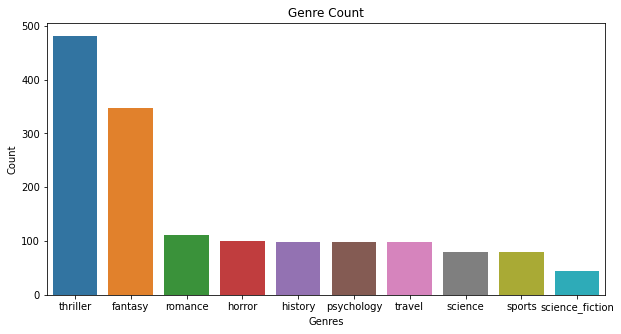

In [25]:
#Generating a countplot for target label
plt.figure(figsize=(10,5))
sns.barplot(x=df['genre'].value_counts().index,y=df['genre'].value_counts())
plt.title('Genre Count')
plt.xlabel('Genres')
plt.ylabel('Count');

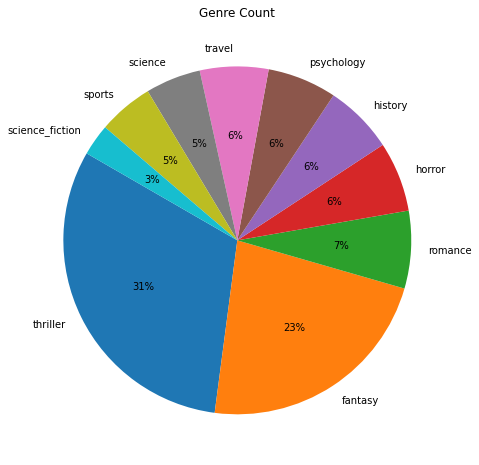

In [26]:
#Generating a pie chart for target label
plt.figure(figsize=(10,8))
plt.pie(x=df['genre'].value_counts(),labels=df['genre'].value_counts().index,textprops={'fontsize':10},startangle=150,autopct='%1.0f%%')
plt.title('Genre Count');

In [27]:
df['genre'].value_counts()

thriller           481
fantasy            348
romance            111
horror             100
history             99
psychology          99
travel              98
science             79
sports              79
science_fiction     45
Name: genre, dtype: int64